In [1]:
import torch

from reggae.utilities import save, load

from reggae.gp.variational.models import NonLinearLFM, ExponentialLFM
from reggae.gp.variational.trainer import TranscriptionalTrainer
from reggae.data_loaders import HafnerData
from reggae.plot.variational_plotters import Plotter
from matplotlib import pyplot as plt

import numpy as np

f64 = np.float64

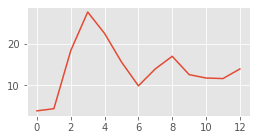

In [2]:
known_target_genes = [
    'CDKN1A', #p21
    'SESN1', #hPA26
    'DDB2',
    'TNFRSF10B',
    'BIK',
]

dataset = HafnerData('../data/', extra_targets=False)
num_genes = len(dataset)
num_tfs = 1
num_times = dataset[0][0].shape[0]

t_inducing = torch.linspace(0, 1, num_times, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(0, 1, num_times).view(-1)
t_predict = torch.linspace(f64(0), f64(1), 80, dtype=torch.float64)

m_observed = torch.stack([
    dataset[i][1] for i in range(num_genes)
])

plt.figure(figsize=(4, 2))
plt.plot(dataset[0][1])

In [3]:
model = NonLinearLFM(num_genes, num_tfs, t_inducing, dataset, fixed_variance=None)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = TranscriptionalTrainer(model, optimizer, dataset)

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=learn_inducing)


### Outputs prior to training:

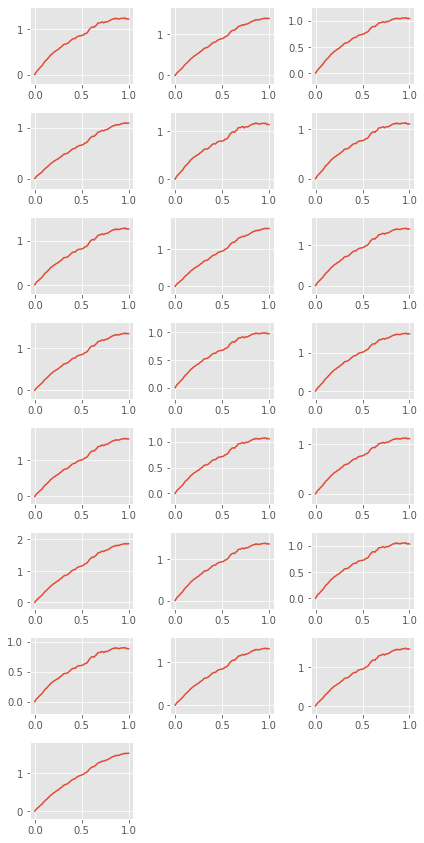

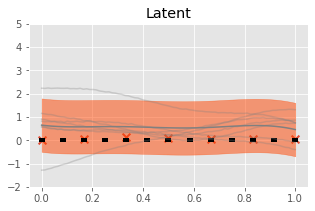

In [4]:
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

plotter = Plotter(model, np.array(dataset.gene_names))
plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)

In [ ]:
tol = 1e-2
# trainer = Trainer(optimizer)
output = trainer.train(100, rtol=tol, atol=tol/10, report_interval=5, plot_interval=10, num_samples=3)

Epoch 1/100 - Loss: 23516.86 (23516.86 0.00) λ: 0.239 b: 0.82 d 1.73 s: 2.29
Epoch 6/100 - Loss: 14721.71 (14274.68 447.02) λ: 0.107 b: 1.69 d 0.80 s: 3.20
Epoch 11/100 - Loss: 9173.36 (8956.83 216.53) λ: 0.042 b: 2.39 d 0.05 s: 3.95
Epoch 16/100 - Loss: 7225.08 (7188.03 37.04) λ: 0.018 b: 2.99 d -0.07 s: 4.63
Epoch 21/100 - Loss: 6810.96 (6784.41 26.54) λ: 0.009 b: 3.56 d -0.07 s: 5.25
Epoch 26/100 - Loss: 5785.59 (5758.96 26.64) λ: 0.006 b: 3.87 d 0.03 s: 5.60
Epoch 31/100 - Loss: 5037.85 (5011.10 26.75) λ: 0.005 b: 3.88 d 0.46 s: 5.56
Epoch 36/100 - Loss: 4702.25 (4675.74 26.51) λ: 0.005 b: 3.92 d 0.75 s: 5.60
Epoch 41/100 - Loss: 4224.80 (4198.23 26.57) λ: 0.005 b: 3.96 d 0.93 s: 5.68


### Outputs after training

In [ ]:
plotter = Plotter(model, np.array(dataset.gene_names))

plotter.plot_losses(trainer, last_x=100)
plotter.plot_outputs(t_predict)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)


In [ ]:
save(model, 'nonlinear')

In [ ]:
do_load = False
if do_load:
    model = load('nonlinear', NonLinearLFM, num_genes, num_tfs,
                 t_inducing, dataset, extra_points=2, fixed_variance=dataset.variance)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    trainer = TranscriptionalTrainer(model, optimizer, dataset)